# Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Loading Dataset

In [84]:
# Using pandas 'read_csv' function to read the csv file
df = pd.read_csv('movies.csv')
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


# Exploring Dataset:

In [85]:
df.info() # using info function to print details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [86]:
# The above information shows that the dataset has 7668 entries (rows) and 15 columns
# Dataset have categorical, and numeric columns both

# Null Values:

In [87]:
df.isnull().sum() # Using is null

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [88]:
# The above information shows that the dataset has a null values.

# Removing Null Values

In [89]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [90]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

# Exploring Duplicates:

In [91]:
# Using duplicated function to explore the duplicate entries and
#it is showing that the dataset has not any duplicate entries
df.duplicated().sum()

0

# Exploring Statistical Information:

In [92]:
df.describe().T # Using describe function to understand statistics of dataset

,count,mean,std,min,25%,50%,75%,max
year,5421.0,2.001661e+03,1.054091e+01,1980.0,1993.0,2002.0,2011.0,2.020000e+03
score,5421.0,6.392455e+00,9.627300e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,5421.0,1.150661e+05,1.844073e+05,195.0,19000.0,52000.0,129000.0,2.400000e+06
budget,5421.0,3.600917e+07,4.157337e+07,6000.0,10000000.0,21800000.0,45000000.0,3.560000e+08
gross,5421.0,1.032297e+08,1.873027e+08,309.0,10736401.0,36869414.0,112462508.0,2.847246e+09
runtime,5421.0,1.081527e+02,1.811570e+01,63.0,95.0,105.0,118.0,2.710000e+02


In [93]:
numerical_df = df.select_dtypes(include=['int', 'float']) # Extracting numerical columns for label encoding
numerical_columns = numerical_df.columns

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Calculate mean, median, standard deviation, skewness, and kurtosis for each numeric column
statistics = {
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Standard Deviation': numerical_df.std(),
    'Skewness': numerical_df.apply(skew),
    'Kurtosis': numerical_df.apply(kurtosis)
}

# Convert statistics to a DataFrame for plotting
statistics_df = pd.DataFrame(statistics)
statistics_df

,Mean,Median,Standard Deviation,Skewness,Kurtosis
year,2.001661e+03,2002.0,1.054091e+01,-0.193882,-1.010932
score,6.392455e+00,6.5,9.627300e-01,-0.633243,1.128661
votes,1.150661e+05,52000.0,1.844073e+05,4.331851,28.833853
budget,3.600917e+07,21800000.0,4.157337e+07,2.442705,7.416570
gross,1.032297e+08,36869414.0,1.873027e+08,4.666829,35.281835
runtime,1.081527e+02,105.0,1.811570e+01,1.424868,4.575963


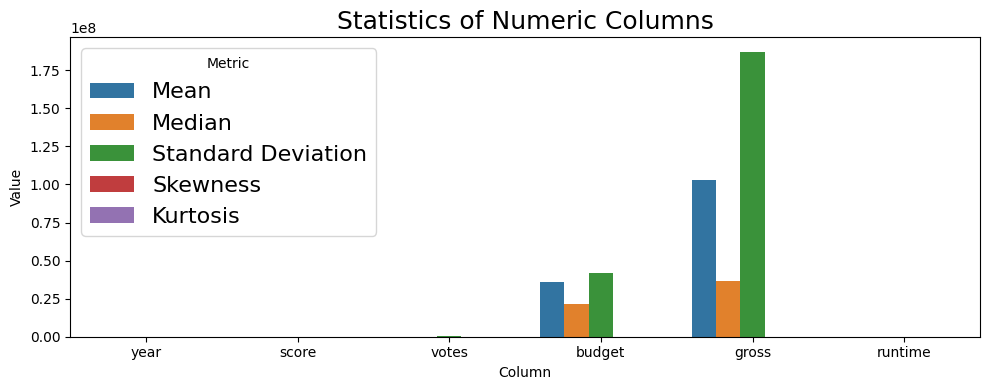

<Figure size 640x480 with 0 Axes>

In [95]:
# Reset index to turn the index into a column
statistics_df.reset_index(inplace=True)

# Melt the DataFrame
melted_df = statistics_df.melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot the statistics
plt.figure(figsize=(10, 4))
sns.barplot(x='index', y='Value', hue='Statistic', data=melted_df)
plt.title('Statistics of Numeric Columns', fontsize= 18)
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks()
plt.legend(title='Metric', fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig('stats.jpg')

# Visualization:

In [96]:
plt.figure(figsize=(22, 18))
def count_plot(df, x_axis):
  sns.countplot(data=df, x=x_axis, palette="viridis")
  plt.title(f'Count Plot of {x_axis}')
  plt.xlabel(x_axis)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

<Figure size 2200x1800 with 0 Axes>

In [97]:
# Number of Movies Released Each Year

<ipython-input-96-aa62e185a062>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=x_axis, palette="viridis")


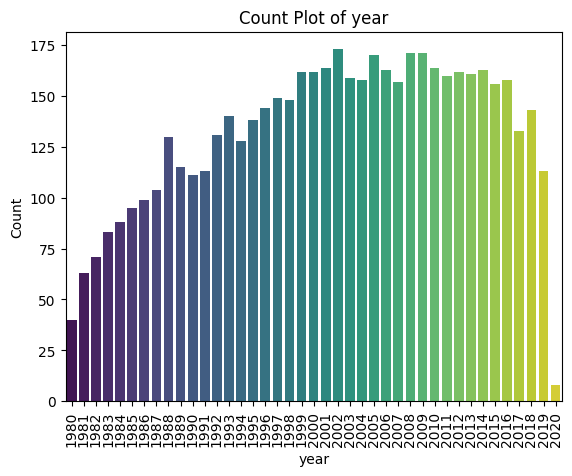

In [98]:
count_plot(df, 'year')

In [99]:
def scatter_plot(df, x_axis, y_axis):
  sns.scatterplot(data=df, x=x_axis, y=y_axis, palette="viridis")
  plt.title(f'Scatter Plot of {x_axis} vs {y_axis}')
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.show()

<ipython-input-99-abec6f4f58ef>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x_axis, y=y_axis, palette="viridis")


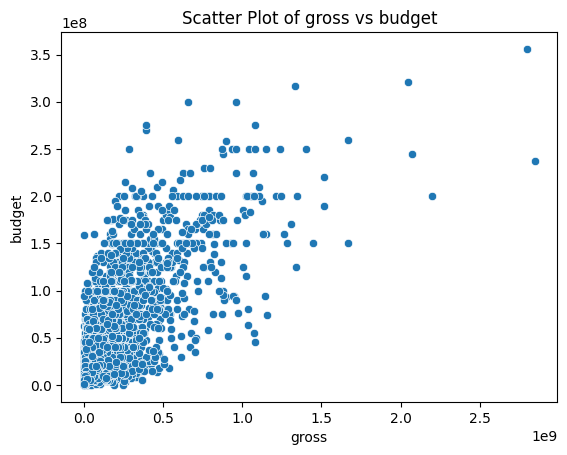

In [100]:
scatter_plot(df, 'gross', 'budget')

In [101]:
def bar_plot(df, x_axis, y_axis):
  sns.barplot(data=df, x=x_axis, y=y_axis, palette="viridis")
  plt.title(f'Bar Plot of {x_axis} vs {y_axis}')
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.show()

<ipython-input-101-53bab68bc11a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x_axis, y=y_axis, palette="viridis")


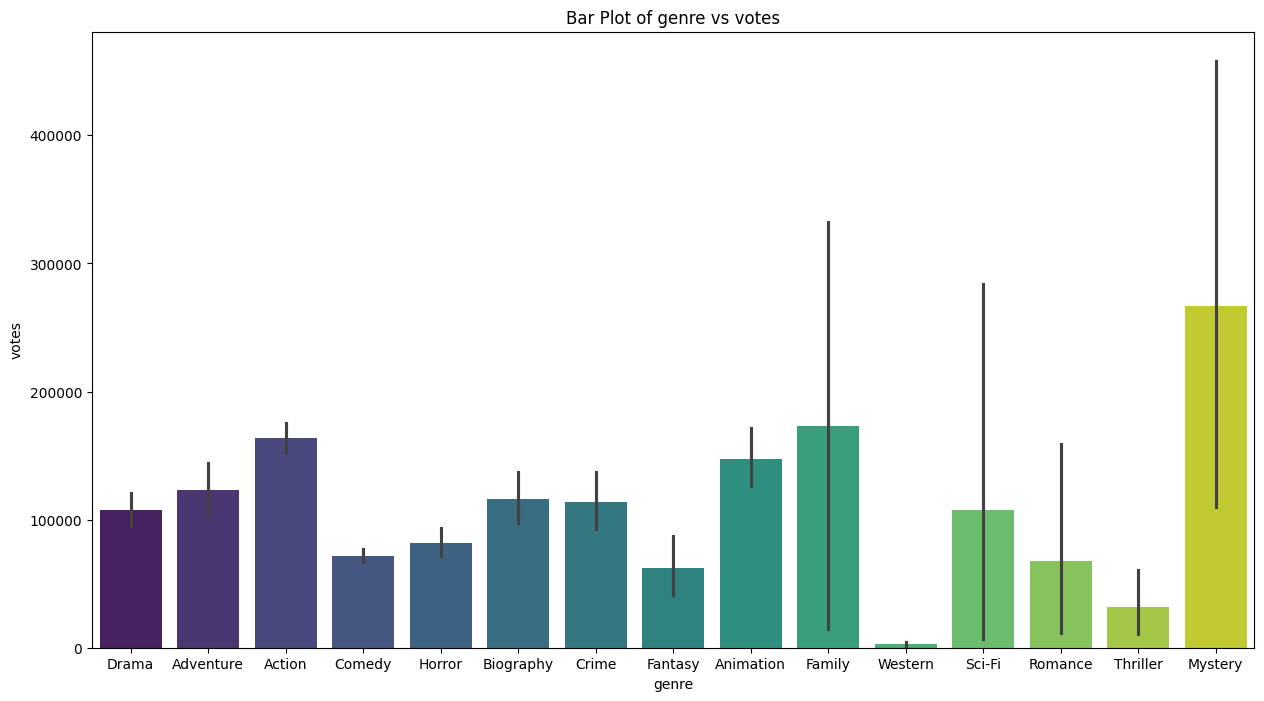

In [102]:
plt.figure(figsize=(15, 8))
bar_plot(df, 'genre', 'votes')

# Label Encoding:

In [103]:
categorical_df = df.select_dtypes(include=['object', 'category']) # Extracting categorical columns for label encoding
categorical_columns = categorical_df.columns

In [104]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is  dataframe with categorical columns
label_encoder = LabelEncoder()
encoded_df = df.copy()

for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(df[col])

# Correlation:

In [105]:
corr = encoded_df.corr() # Now find correlation between features using corr( ) functions
corr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


In [106]:
def correlation_plot(x):
  plt.figure(figsize=(15, 8))
  sns.heatmap(x, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.2)
  plt.title('Correlation Heatmap', fontsize=25)
  plt.show()

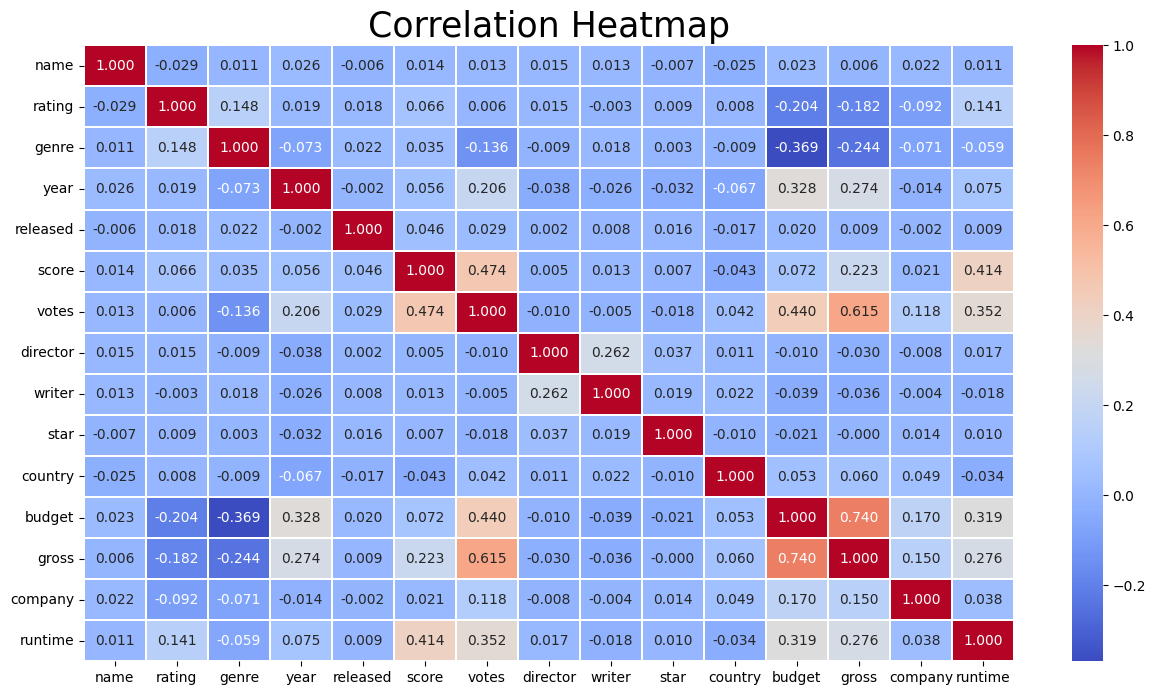

In [107]:
correlation_matrix = encoded_df.corr()
# Plotting heatmap for viualising correlation
correlation_plot(correlation_matrix)

# Feature Engineering

In [108]:
# Extracting required columns
columns_required = ['budget', 'genre', 'name', 'company', 'country', 'released', 'gross', 'runtime']
df_new = encoded_df[columns_required]
df_new.head()

,budget,genre,name,company,country,released,gross,runtime
0,19000000.0,6,4692,1426,46,1304,46998772.0,146.0
1,4500000.0,1,3929,452,47,1127,58853106.0,104.0
2,18000000.0,0,3641,945,47,1359,538375067.0,124.0
3,3500000.0,4,204,1108,47,1127,83453539.0,88.0
4,6000000.0,4,732,1083,47,1170,39846344.0,98.0


# Scaling:

In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new)
scaled_data

array([[-0.4091739 ,  1.02101974,  1.3148946 , ...,  0.02070324,
        -0.30024161,  2.08938966],
       [-0.757987  , -0.88442917,  0.81897657, ..., -0.21640717,
        -0.23694606, -0.22925545],
       [-0.43322997, -1.26551896,  0.63178864, ...,  0.09438161,
         2.32343428,  0.87486127],
       ...,
       [ 3.34357397, -0.88442917, -0.98530709, ..., -0.51513949,
         0.75957906, -0.39487295],
       [ 2.38133092, -0.88442917,  0.85082452, ..., -0.71072209,
         0.04205262, -0.45007879],
       [ 1.05824674, -1.26551896,  0.92361982, ..., -1.23048954,
         1.91254539,  2.25500717]])

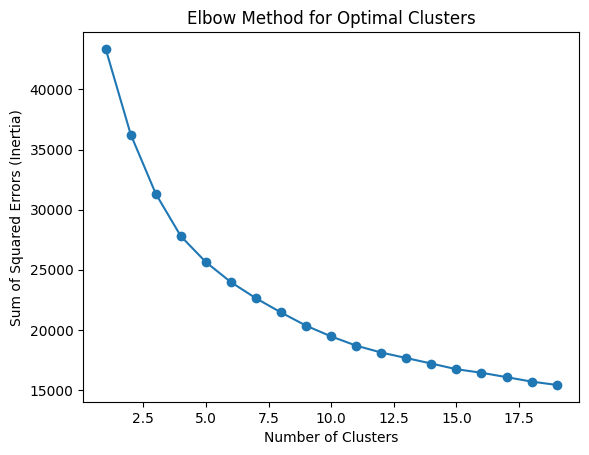

In [110]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize a list to store the inertia values for different cluster counts
sse_values = []

# Loop through a range of cluster numbers to find the optimal number of clusters
for num_clusters in range(1, 20):
    # Create a KMeans instance with the current number of clusters
    kmeans_model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=500, n_init=10, random_state=0)

    # Fit the KMeans model to the scaled dataset
    kmeans_model.fit(scaled_data)  # Using scaled_data as the standardized data

    # Store the inertia value (sum of squared distances of samples to their nearest cluster center)
    sse_values.append(kmeans_model.inertia_)

# Plot the Elbow Method graph to visualize the inertia values
plt.plot(range(1, 20), sse_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (Inertia)')
plt.show()

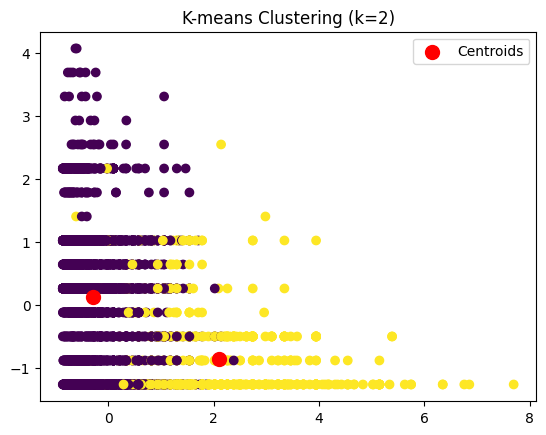

In [111]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Initialize the KMeans model with 2 clusters
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=500, n_init=10, random_state=0)
# Fit the KMeans model and predict the cluster for each sample
cluster_labels = kmeans_model.fit_predict(scaled_data)

# Append the inertia value (sum of squared distances of samples to their closest cluster center)
sse_values.append(kmeans_model.inertia_)

# Scatter plot of the data points colored by their cluster
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels)

# Scatter plot of the cluster centers
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

# Title and legend for the plot
plt.title(f'K-means Clustering (k={2})')
plt.legend()
plt.show()

# Predicting Gross by Budget:

# Line Fitting:

In [112]:
X_feature = df[['budget']]
y_feature = encoded_df[['gross']]

In [113]:
x = scaler.fit_transform(X_feature)
y = scaler.fit_transform(y_feature)

# Linear Regression with sklearn:

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Independent variables as a DataFrame
independent_vars = pd.DataFrame(x)
# Dependent variable
dependent_var = y

# Split the dataset into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(independent_vars, dependent_var, test_size=0.2, random_state=42)

# Initialize the multiple linear regression model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train_split, y_train_split)

# Make predictions on the testing set
predictions = linear_model.predict(X_test_split)

# Print the model's coefficients
print(linear_model.coef_)

# Extract the first coefficient
beta1 = linear_model.coef_[0][0]
# Extract the intercept
alpha = linear_model.intercept_

print(alpha)

[[0.72952052]]
[-0.00205277]


In [115]:
from scipy import stats as st

# Reformat the linear regression results
regression_params = np.append(linear_model.coef_, linear_model.intercept_)
# Use the trained model to make predictions on the test set
test_predictions = linear_model.predict(X_test_split)

# Calculate the sum of squared residuals
ssr = sum((y_test_split - test_predictions) ** 2)
# Degrees of freedom (number of observations - number of parameters)
degrees_freedom = len(y_train_split) - len(regression_params)
# Calculate the mean squared error
mean_sq_error = ssr / degrees_freedom

# Add a constant column to the training set
X_train_split['Constant'] = 1
# Calculate the covariance matrix of the parameters
cov_matrix = mean_sq_error * np.diagonal(np.linalg.inv(X_train_split.T @ X_train_split))
# Calculate the standard errors of the parameters
standard_errors = np.sqrt(cov_matrix)

# Calculate the t-statistics for each parameter
t_stats = regression_params / standard_errors
# Two-tailed test
two_tailed = 2
# Calculate the p-values for the t-statistics
p_vals = [two_tailed * (1 - st.t.cdf(np.abs(t_stat), degrees_freedom)) for t_stat in t_stats]

# Significance level
significance_level = 0.05
# Calculate the critical value for the t-distribution
t_critical = st.t.ppf(1 - (significance_level / two_tailed), degrees_freedom)
# Calculate the margin of error
margin_error = t_critical * standard_errors

# Calculate the 95% confidence intervals for the parameters
confidence_interval_upper = regression_params + margin_error
confidence_interval_lower = regression_params - margin_error

In [116]:
# Configure pandas to display more columns and a wider output
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

# Collect the results into a list for display
results = [regression_params, standard_errors, t_stats, np.array(p_vals), confidence_interval_lower, confidence_interval_upper]

# Define the index for the DataFrame
result_index = ['Value', 'Standard Error', 't-Statistic', 'p-Value', 'Lower CI', 'Upper CI']

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, index=result_index, columns=list(X_train_split)).round(3)
results_df = results_df.T

# Print the DataFrame with the regression results
results_df

,Value,Standard Error,t-Statistic,p-Value,Lower CI,Upper CI
0,0.730,0.006,128.535,0.000,0.718,0.741
Constant,-0.002,0.006,-0.369,0.712,-0.013,0.009


# Confidence Interval Plot Using Seaborn library:

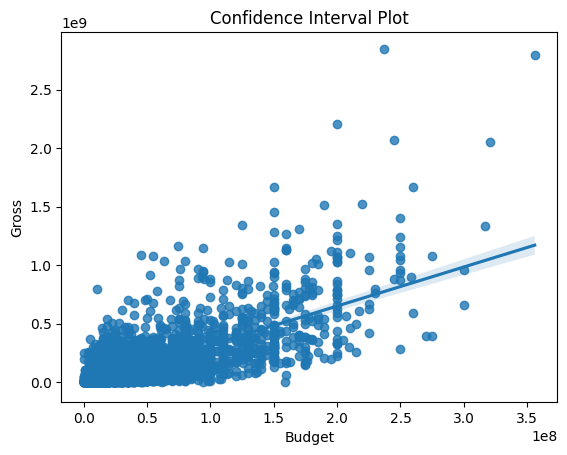

In [117]:
# Plot regplot using seaborn
sns.regplot(x='budget', y='gross', data=df)
plt.title('Confidence Interval Plot')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

R-squared: 0.56


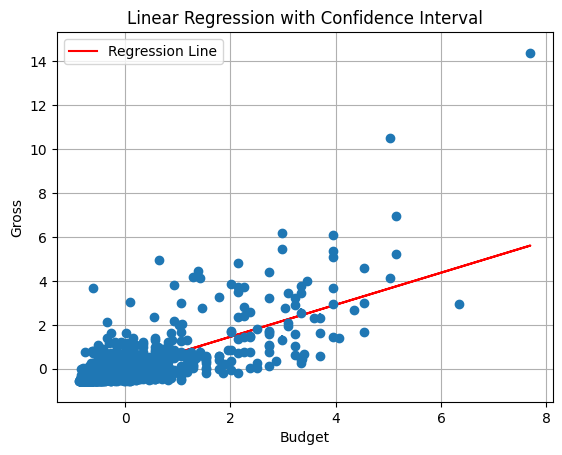

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate the data into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_set, y_train_set)

# Make predictions on the test data
y_predictions = regression_model.predict(X_test_set)

# Calculate the confidence interval for the predictions
confidence_level = 0.95
squared_diffs = (y_predictions - y_test_set) ** 2
mean_squared_err = np.mean(squared_diffs)
standard_dev = np.std(squared_diffs)
error_margin = 1.96 * (standard_dev / np.sqrt(len(y_predictions)))
conf_interval = (mean_squared_err - error_margin, mean_squared_err + error_margin)

# Generate random indices to select 20 random values for plotting
random_indices = np.random.choice(np.arange(3000), size=20, replace=False)

# Plot the actual data points with error bars
plt.errorbar(X_test_set.flatten(), y_test_set.flatten(), yerr=error_margin, fmt='o')

# Plot the linear regression line
plt.plot(X_test_set, y_predictions, color='red', label='Regression Line')

# Calculate and display the R-squared value
r2_value = regression_model.score(X_test_set, y_test_set)
print(f'R-squared: {r2_value:.2f}')

plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Linear Regression with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()
